In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plot
from sklearn.linear_model import LinearRegression
import re
import json

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/sample_data/covid_cases.csv')
df.head(10)

,State Name,State Code,Indicator Name,2019,2020,2021,2022,2023,2024,2025,2026
0,Tamil Nadu,ANB,Covid-19,54211,55438,56225,56695,57032,57360,57715,58055
1,Assam,SDJ,Covid-19,8996973,9169410,9351441,9543205,9744781,9956320,10174836,10399926
2,Gujarat,JSD,Covid-19,5454933,5531472,5608539,5679458,5735044,5770570,5781214,5774243
3,Kerala,URH,Covid-19,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598
4,Mumbai,JSJ,Covid-19,13411,14375,15370,16412,17469,18549,19647,20758
5,Andhra Pradesh,USJ,Covid-19,92197753,94724510,97334442,100034179,102832760,105736431,108758610,111899364
6,Uttrapradesh,XBC,Covid-19,92418,100796,112118,125130,138039,149857,159976,169771
7,Karnataka,JXC,Covid-19,20481779,20817266,21153052,21488912,21824425,22159650,22494035,22828869
8,Telngana,XXC,Covid-19,1874121,1941492,2009526,2077578,2145001,2211319,2276034,2339127
9,Delhi,XCC,Covid-19,20123,20602,21253,22034,22854,23672,24462,25248


In [ ]:
bd=df.loc[df['State Name']=='Tamil Nadu']
bd.drop(['State Name','State Code','Indicator Name'],axis=1,inplace=True)
bd = bd.T
bd.head(11)

,0
2019,54211
2020,55438
2021,56225
2022,56695
2023,57032
2024,57360
2025,57715
2026,58055


In [ ]:
bd.dropna(inplace=True)
bd=bd.reset_index().rename(columns={0:'population','index':'year'})
bd.head()

,year,population
0,2019,54211
1,2020,55438
2,2021,56225
3,2022,56695
4,2023,57032


In [ ]:
x = bd.iloc[:, 0].values.reshape(-1, 1)
y = bd.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict([[2018]])
y_pred

array([[54339.5]])

In [ ]:
def main():
  global yearl
  yearl = []
  global resultl
  resultl = []
  for x in range(0,3):
    State = input("Please input the State name: ").lower()
    global year
    year = int(input("Please input the year to predict: "))
    df = pd.read_csv('/content/sample_data/covid_cases.csv')
    lists, df = State_list_gen(df)
    if State in lists:
        df = selecting_State(df, State)
        model = prediction_model(df)
        global result
        result = prediction(model,year)
        print(f"\n Result: {State.upper()} Covid cases in {year} will be {result:,d}")
        yearl.append(year)
        resultl.append(result)
    else:
        print('kindly check State name spelling from State_list.json')

if __name__ == "__main__":
    main()

In [ ]:
def State_list_gen(df):
    df.rename(columns={'State Name':'State_name'},inplace=True)
    df['State_name'] = df['State_name'].apply(lambda row: row.lower())
    lists = df['State_name'].unique().tolist()
    with open('State_list.json','w', encoding='utf-8') as f:
        json.dump(lists, f, ensure_ascii=False,indent=4)
    return lists, df

In [ ]:
def main():
    State = input("Please input the State name: ").lower()
    year = int(input("Please input the year to predict: "))
    df = pd.read_csv('/content/sample_data/covid_cases.csv')
    lists, df = State_list_gen(df)
    if State in lists:
        df = selecting_State(df, State)
        model = prediction_model(df)
        result = prediction(model,year)
        print(f"\n Result: {State.upper()} population in {year} will be {result:,d}")
    else:
        print('kindly check available State name and thier spelling from State_list.json')

In [ ]:
def selecting_State(df,State):
    df = df.loc[df['State_name']==State]
    df.drop(['State_name','State Code','Indicator Name'],axis=1,inplace=True)
    df = df.T
    df.dropna(inplace=True)
    df = df.reset_index()
    return df
def prediction_model(df):
    x = df.iloc[:, 0].values.reshape(-1,1)
    y = df.iloc[:, 1].values.reshape(-1,1)
    model = LinearRegression().fit(x,y)
    return model
def prediction(model, year):
    return int(model.coef_[0][0] * year + model.intercept_[0])

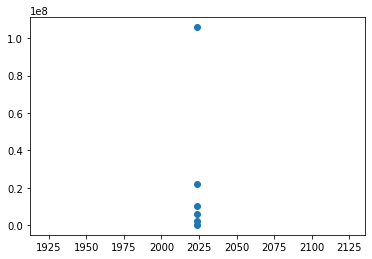

In [ ]:
plt.scatter(yearl,resultl)
plt.show()